# Dense Neural Network 
## Tensorflow Functional API 
@rajeev

* Build Model
* Download MNIST fashion data and pre-process 
* Compile Model
    * Setup Tensorboard callback
    * Setup Checkpoints callback
* Train the model
* Evaluate accuracy
* Inference
* View weights and bias

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Build model

In [20]:
inputs = tf.keras.Input(shape=(28,28))
flatten = tf.keras.layers.Flatten()
x1 = flatten(inputs)

dense1 = tf.keras.layers.Dense(128, activation='swish')
x2 = dense1(x1)

dense2 = tf.keras.layers.Dense(10)
outputs = dense2(x2)

In [21]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


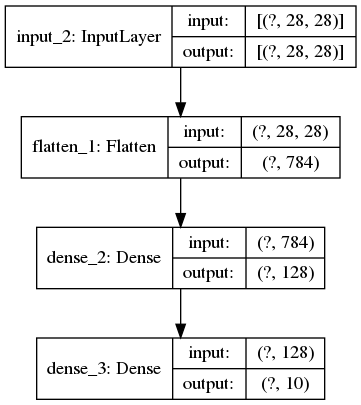

In [22]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

## Download MNIST fashion dataset and pre-process 

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

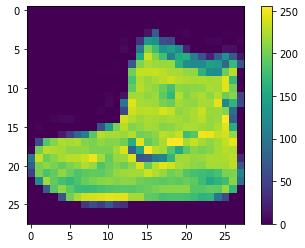

(28, 28)


In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(train_images[0].shape)

In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0

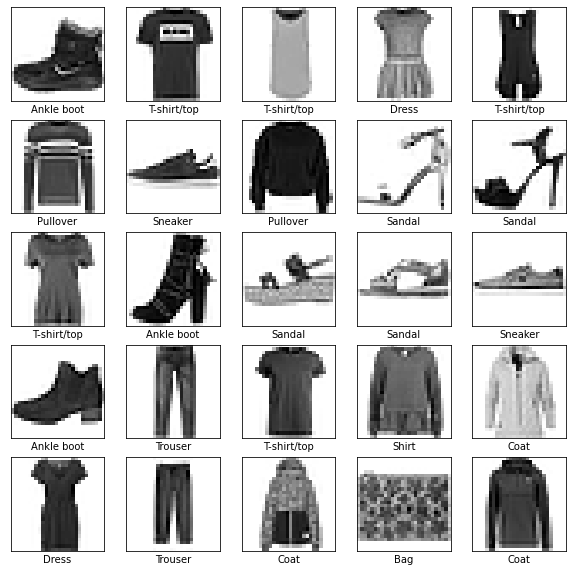

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Compile the model

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Setup Tensorboard callback

In [28]:
import tensorboard
import os
from datetime import datetime
print(tensorboard.__version__)
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

2.3.0


### Setup Checkpoints callback

In [29]:
# save checkpoints
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model.save("/tmp/model")

INFO:tensorflow:Assets written to: /tmp/model/assets


## Train the Model

In [30]:
model.fit(train_images, train_labels, epochs=10,  callbacks=[tensorboard_callback, cp_callback])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.4889 - accuracy: 0.8273
Epoch 00001: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 2s 895us/step - loss: 0.4889 - accuracy: 0.8273
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.3629 - accuracy: 0.8679
Epoch 00002: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 1s 767us/step - loss: 0.3626 - accuracy: 0.8680
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.3244 - accuracy: 0.8812
Epoch 00003: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 1s 767us/step - loss: 0.3243 - accuracy: 0.8812
Epoch 4/10
1830/1875 [============================>.] - ETA: 0s - loss: 0.2975 - accuracy: 0.8900
Epoch 00004: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 1s 787us/step - loss: 0.2978 - accuracy: 0.8900
Epoch 5/10
1867/1875 [======================

## Evaluate accuracy

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3351 - accuracy: 0.8874

Test accuracy: 0.8873999714851379


## Inference

In [14]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[0])
nn = test_labels[np.argmax(predictions[0])]
print(nn, class_names[nn])

[1.0342608e-09 3.1120981e-09 1.7081970e-08 6.4114930e-10 6.8936878e-09
 6.0062663e-05 2.3611716e-07 2.4844729e-03 1.4573021e-08 9.9745518e-01]
7 Sneaker


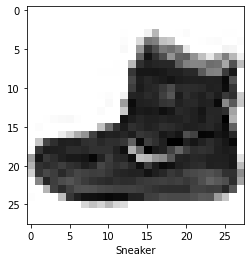

In [15]:
plt.figure(2)
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[nn])
plt.show()

## View weights and biases

In [16]:
model.layers

In [17]:
weights, biases = model.layers[3].get_weights()

In [18]:
print(weights.shape, biases.shape)

(128, 10) (10,)


In [19]:
print ("Biases : ", biases)

Biases :  [ 0.03656113 -0.4208534   0.16040528  0.31441358 -0.36668468  0.11950091
  0.14937435  0.18650655 -0.1472937  -0.46046817]
